# Aufgabe 1: Separierbare FIlter

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [2]:
m1 = 1/ 3 * np.array([[1, 1, 1]]).T
m2 = np.transpose(m1)

M = m1 * m2
print('m1 * m2 = \n', M)
M = m2 * m1
print('\nm2 * m1 = \n', M)

m1 * m2 = 
 [[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]

m2 * m1 = 
 [[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


# Aufgabe 2: Medianfilter ist Shiftinvariant

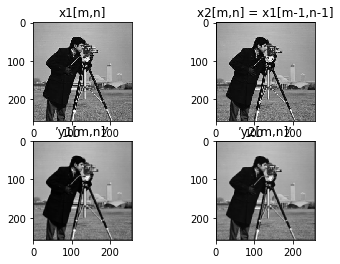

In [3]:
img = cv2.imread(r'images/cameraman.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

x1 = cv2.copyMakeBorder(img, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=0)

medianFilter = np.ones((3,3))/9
y1 = cv2.filter2D(x1, -1, medianFilter)

x2 = np.zeros((258,258))
x2[2:257,2:257] = x1[1:256,1:256]

y2 = cv2.filter2D(x2, -1, medianFilter)

y1_shifted = np.zeros((258,258))
y1_shifted[2:257,2:257] = y1[1:256,1:256]

plt.subplot(2,2,1)
plt.title("x1[m,n]")
plt.imshow(x1, cmap="gray")
plt.subplot(2,2,2)
plt.title("x2[m,n] = x1[m-1,n-1]")
plt.imshow(x2, cmap="gray")
plt.subplot(2,2,3)
plt.title("’y1[m,n]’")
plt.imshow(y1, cmap="gray")
plt.subplot(2,2,4)
plt.title("’y2[m,n]’")
plt.imshow(y2, cmap="gray")


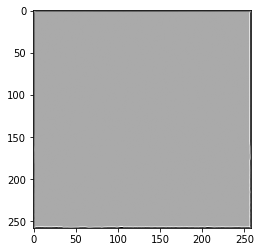

In [4]:
diff = y1_shifted - y2
plt.imshow(diff, cmap="gray")

# Aufgabe 3: Laplace-Filter

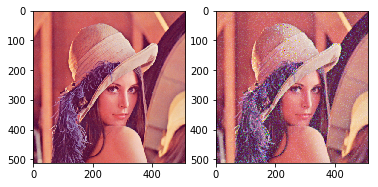

In [5]:
img = cv2.imread("images/lena_std.tif")
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

h,s,v = cv2.split(img)
binomfilter = np.array([[1,2,1], [2,4,2], [1,2,1]])
v_filter = cv2.filter2D(v, -1, binomfilter)
hsv_binom = np.dstack([h, s, v_filter])
rgb_binom = cv2.cvtColor(hsv_binom, cv2.COLOR_HSV2RGB)

img_lap = cv2.Laplacian(rgb_binom, -1, 1)

img = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
out_img = img + img_lap
plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(out_img, cmap="gray")

With Blur-Function:

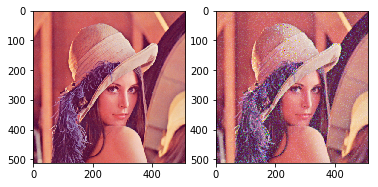

In [6]:
img = cv2.imread("images/lena_std.tif")
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

h,s,v = cv2.split(img)
v_fitler = cv2.blur(v,(3,3))
hsv_binom = np.dstack([h, s, v_filter])
rgb_binom = cv2.cvtColor(hsv_binom, cv2.COLOR_HSV2RGB)

img_lap = cv2.Laplacian(rgb_binom, -1, 1)

img = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
out_img = img + img_lap
plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(out_img, cmap="gray")

Only Laplace:

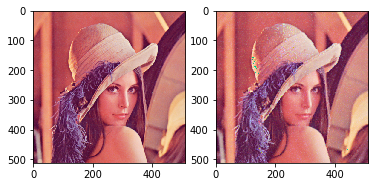

In [7]:
img = cv2.imread("images/lena_std.tif")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_lap = cv2.Laplacian(img, -1, 1)

out_img = img + img_lap
plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(out_img, cmap="gray")

# Aufgabe 4: Betrag des Gradienten


Führen Sie mit dem Bild Zebra.png die gleichen Operationen durch wie in der nachfolgenden Bildserie gezeigt. Schreiben Sie alle MATLAB/Octave-Befehle auf und vergleichen Ihr Resultat mit der hier gezeigten Bildserie!

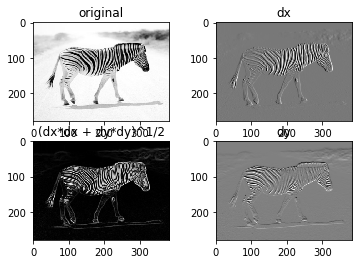

In [8]:
img = cv2.imread("images/Zebra.png", 0)
kernelY = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
kernelX = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

dx = cv2.filter2D(img, cv2.CV_64F, kernelX)
dy = cv2.filter2D(img, cv2.CV_64F, kernelY)

absoluteGradient = np.sqrt(np.add(np.square(dx), np.square(dy)))

plt.subplot(2, 2, 1)
plt.title('original')
plt.imshow(img, cmap = 'gray')
plt.subplot(2, 2, 2)
plt.title('dx')
plt.imshow(dx, cmap = 'gray')
plt.subplot(2, 2, 4)
plt.title('dy')
plt.imshow(dy, cmap = 'gray')
plt.subplot(2, 2, 3)
plt.title('(dx*dx + dy*dy)^1/2')
plt.imshow(absoluteGradient, cmap = 'gray')

# Aufgabe 5: Gauss- und Laplacepyramide

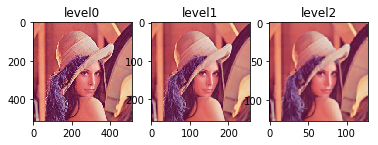

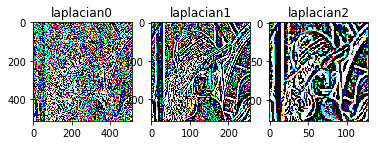

In [12]:
img = cv2.imread('images/lena_std.tif')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Gn = pyr_reduce(Gn-1) wobei G0 = Image
level0 = img
level1 = cv2.pyrDown(level0)
level2 = cv2.pyrDown(level1)
level3 = cv2.pyrDown(level2)

plt.subplot(1, 3, 1)
plt.imshow(level0)
plt.title('level0')
plt.subplot(1, 3, 2)
plt.imshow(level1)
plt.title('level1')
plt.subplot(1, 3, 3)
plt.imshow(level2)
plt.title('level2')
plt.show()

# Ln = Gn - pyr_expand(Gn+1) wobei G0 = Image
laplacian0 = level0 - cv2.pyrUp(level1)
laplacian1 = level1 - cv2.pyrUp(level2)
laplacian2 = level2 - cv2.pyrUp(level3)

plt.subplot(1, 3, 1)
plt.imshow(laplacian0)
plt.title('laplacian0')
plt.subplot(1, 3, 2)
plt.imshow(laplacian1)
plt.title('laplacian1')
plt.subplot(1, 3, 3)
plt.imshow(laplacian2)
plt.title('laplacian2')
plt.show()

The level 0 image can now be reconstructed using the lower resolution image and the laplacian:

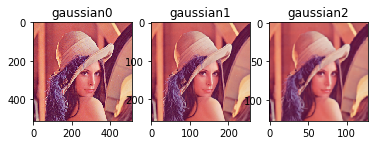

In [15]:
#Gn = Ln + pyr_expand(Gn+1)
gaussian2 = laplacian2 + cv2.pyrUp(level3)
gaussian1 = laplacian1 + cv2.pyrUp(level2)
gaussian0 = laplacian0 + cv2.pyrUp(level1)

plt.subplot(1, 3, 1)
plt.imshow(gaussian0)
plt.title('gaussian0')
plt.subplot(1, 3, 2)
plt.imshow(gaussian1)
plt.title('gaussian1')
plt.subplot(1, 3, 3)
plt.imshow(gaussian2)
plt.title('gaussian2')
plt.show()

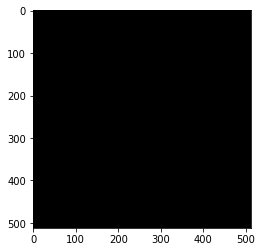

In [16]:
x0 = level0 - gaussian0
plt.imshow(x0)